# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Data/CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
#pd.set_option('display.max_rows', None)

#SMALL_SIZE = 10
#MEDIUM_SIZE = 15
#LARGE_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
climatological_data = data[data['Disaster Subgroup'] == 'Climatological']

# count number of disasters in each year for each subgroup
climatological_disaster_counts = climatological_data['Year'].value_counts().sort_index()

# save index of years
climatological_disaster_counts_index = climatological_disaster_counts.index

# sum costs by year
climatological_costs = climatological_data[['Year', 'Total Damages']]
climatological_costs = climatological_costs.groupby('Year').sum()
climatological_costs = climatological_costs.squeeze()

# SPLIT CLIMATOLOGICAL DISASTERS

In [4]:
# display unique types
for dtype in climatological_data['Disaster Type'].unique():
    print(dtype)

Drought
Wildfire


In [5]:
# create new dataframes for each type
drought_data = climatological_data[climatological_data['Disaster Type'] == 'Drought']
wildfire_data = climatological_data[climatological_data['Disaster Type'] == 'Wildfire']

# count number of disasters in each year for each subgroup
drought_disaster_counts = drought_data['Year'].value_counts().sort_index()
wildfire_disaster_counts = wildfire_data['Year'].value_counts()
wildfire_disaster_counts[1988] = 0
wildfire_disaster_counts = wildfire_disaster_counts.sort_index()
# save index of years
drought_disaster_counts_index = drought_disaster_counts.index
wildfire_disaster_counts_index = wildfire_disaster_counts.index

# CLIMATOLOGICAL DISASTER OCCURANCE ANALYSIS

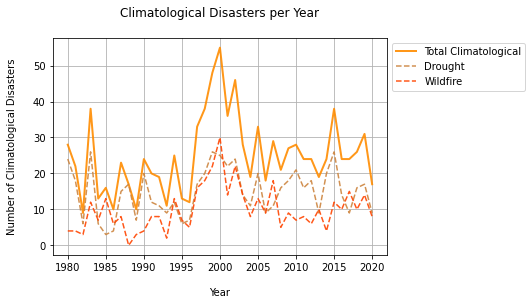

In [6]:
# single line plot

plt.grid(axis = 'both')
plt.title("Climatological Disasters per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Climatological Disasters\n")
plt.plot(climatological_disaster_counts_index,climatological_disaster_counts, linewidth=2, color = 'darkorange', alpha = 0.9, label = 'Total Climatological')
plt.plot(drought_disaster_counts_index, drought_disaster_counts, linestyle = '--', color = 'peru', alpha = 0.9, label = 'Drought')
plt.plot(wildfire_disaster_counts_index, wildfire_disaster_counts, linestyle = '--', color = 'orangered', alpha = 0.9, label = 'Wildfire')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

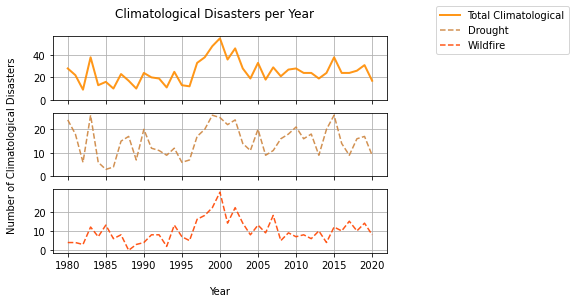

In [7]:
# multiple line plots

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Climatological Disasters per Year\n")
axs[1].set_ylabel("Number of Climatological Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(climatological_disaster_counts_index, climatological_disaster_counts, linewidth=2, color = 'darkorange', alpha = 0.9, label = 'Total Climatological')
axs[1].plot(drought_disaster_counts_index, drought_disaster_counts, linestyle = '--', color = 'peru', alpha = 0.9, label = 'Drought')
axs[2].plot(wildfire_disaster_counts_index, wildfire_disaster_counts, linestyle = '--', color = 'orangered', alpha = 0.9, label = 'Wildfire')

plt.sca(axs[0])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

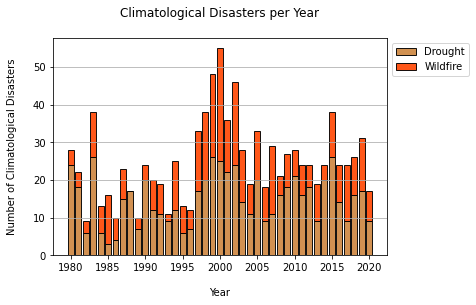

In [8]:
# single bar chart

plt.grid(axis = 'y')
plt.title("Climatological Disasters per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Number of Climatological Disasters\n")

plt.bar(drought_disaster_counts_index, drought_disaster_counts, edgecolor = 'black', color = 'peru', alpha = 0.9, label = 'Drought')
plt.bar(wildfire_disaster_counts_index, wildfire_disaster_counts, bottom = drought_disaster_counts, edgecolor = 'black', color = 'orangered', alpha = 0.9, label = 'Wildfire')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

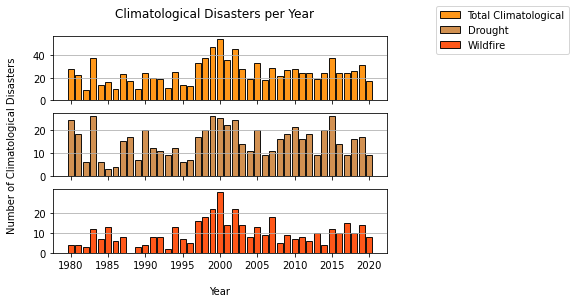

In [9]:
# multiple bar charts

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Climatological Disasters per Year\n")
axs[1].set_ylabel("Number of Climatological Disasters\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(climatological_disaster_counts_index, climatological_disaster_counts, color = 'darkorange', alpha = 0.9, edgecolor = 'black', label = 'Total Climatological')
axs[1].bar(drought_disaster_counts_index, drought_disaster_counts, edgecolor = 'black', color = 'peru', alpha = 0.9, label = 'Drought')
axs[2].bar(wildfire_disaster_counts_index, wildfire_disaster_counts, edgecolor = 'black', color = 'orangered', alpha = 0.9, label = 'Wildfire')

plt.sca(axs[0])
plt.yticks(np.linspace(0,40,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

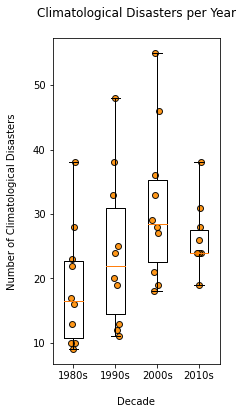

In [10]:
# BOXPLOT TOTAL CLIMATOLOGICAL DATA

total_box_data = [climatological_disaster_counts[0:10], climatological_disaster_counts[10:20], climatological_disaster_counts[20:30], climatological_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Climatological Disasters per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Number of Climatological Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisastersPerYearBOX.png", bbox_inches='tight')

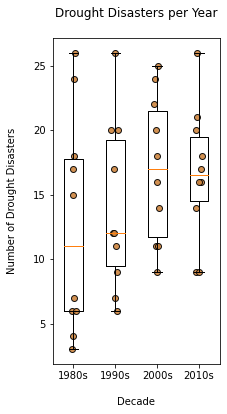

In [11]:
# BOXPLOT DROUGHT DATA

drought_box_data = [drought_disaster_counts[0:10], drought_disaster_counts[10:20], drought_disaster_counts[20:30], drought_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Drought Disasters per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Number of Drought Disasters\n")

plt.boxplot(drought_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,drought_box_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,drought_box_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,drought_box_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,drought_box_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtsPerYearBOX.png", bbox_inches='tight')

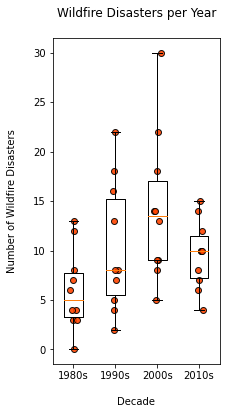

In [12]:
# BOXPLOT WILDFIRE DATA

wildfire_box_data = [wildfire_disaster_counts[0:10], wildfire_disaster_counts[10:20], wildfire_disaster_counts[20:30], wildfire_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Wildfire Disasters per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Number of Wildfire Disasters\n")

plt.boxplot(wildfire_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,wildfire_box_data[0], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,wildfire_box_data[1], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,wildfire_box_data[2], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,wildfire_box_data[3], color = 'orangered', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfiresPerYearBOX.png", bbox_inches='tight')

# CLIMATOLOGICAL DISASTER OCCURANCE STATISTICS

In [13]:
# CLIMATOLOGICAL DISASTER ANALYSIS

print("CLIMATOLOGICAL DISASTER ANALYSIS")

# climatological statistical data
print("\nTotal Climatological Statistical Data: ")
print(climatological_disaster_counts.describe())

# 1980s climatological statistical data
print("\n1980s Climatological Statistical Data: ")
print(climatological_disaster_counts[0:10].describe())

# 1990s climatological statistical data
print("\n1990s Climatological Statistical Data: ")
print(climatological_disaster_counts[10:20].describe())

# 2000s climatological statistical data
print("\n2000s Climatological Statistical Data: ")
print(climatological_disaster_counts[20:30].describe())

# 2010s climatological statistical data
print("\n2010s Climatological Statistical Data: ")
print(climatological_disaster_counts[30:40].describe())

print("\n")

# climatological statistical changes 1980s-2010s
climatological_mean_1980s = climatological_disaster_counts[0:10].mean()
climatological_mean_2010s = climatological_disaster_counts[30:40].mean()
mean_percent_change_climatological_1980_to_2020 = 100*(climatological_mean_2010s-climatological_mean_1980s)/climatological_mean_1980s
print("Mean Climatological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_climatological_1980_to_2020))

climatological_max_1980s = climatological_disaster_counts[0:10].max()
climatological_max_2010s = climatological_disaster_counts[30:40].max()
max_percent_change_climatological_1980_to_2020 = 100*(climatological_max_2010s-climatological_max_1980s)/climatological_max_1980s
print("Max Climatological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_climatological_1980_to_2020))

climatological_min_1980s = climatological_disaster_counts[0:10].min()
climatological_min_2010s = climatological_disaster_counts[30:40].min()
min_percent_change_climatological_1980_to_2020 = 100*(climatological_min_2010s-climatological_min_1980s)/climatological_min_1980s
print("Min Climatological Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_climatological_1980_to_2020))

climatological_std_1980s = climatological_disaster_counts[0:10].std()
climatological_std_2010s = climatological_disaster_counts[30:40].std()
std_percent_change_climatological_1980_to_2020 = 100*(climatological_std_2010s-climatological_std_1980s)/climatological_std_1980s
print("Standard Deviation of Climatological Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_climatological_1980_to_2020))

CLIMATOLOGICAL DISASTER ANALYSIS

Total Climatological Statistical Data: 
count    41.000000
mean     24.878049
std      10.599988
min       9.000000
25%      18.000000
50%      24.000000
75%      29.000000
max      55.000000
Name: Year, dtype: float64

1980s Climatological Statistical Data: 
count    10.000000
mean     18.600000
std       9.287985
min       9.000000
25%      10.750000
50%      16.500000
75%      22.750000
max      38.000000
Name: Year, dtype: float64

1990s Climatological Statistical Data: 
count    10.000000
mean     24.300000
std      12.147702
min      11.000000
25%      14.500000
50%      22.000000
75%      31.000000
max      48.000000
Name: Year, dtype: float64

2000s Climatological Statistical Data: 
count    10.0000
mean     31.2000
std      11.8865
min      18.0000
25%      22.5000
50%      28.5000
75%      35.2500
max      55.0000
Name: Year, dtype: float64

2010s Climatological Statistical Data: 
count    10.000000
mean     26.200000
std       5.181162
min  

In [14]:
# DROUGHT DISASTER ANALYSIS

print("DROUGHT DISASTER ANALYSIS")

# drought statistical data
print("\nTotal Drought Statistical Data: ")
print(drought_disaster_counts.describe())

# 1980s drought statistical data
print("\n1980s Drought Statistical Data: ")
print(drought_disaster_counts[0:10].describe())

# 1990s drought statistical data
print("\n1990s Drought Statistical Data: ")
print(drought_disaster_counts[10:20].describe())

# 2000s drought statistical data
print("\n2000s Drought Statistical Data: ")
print(drought_disaster_counts[20:30].describe())

# 2010s drought statistical data
print("\n2010s Drought Statistical Data: ")
print(drought_disaster_counts[30:40].describe())

print("\n")

# drought statistical changes 1980s-2010s
drought_mean_1980s = drought_disaster_counts[0:10].mean()
drought_mean_2010s = drought_disaster_counts[30:40].mean()
mean_percent_change_drought_1980_to_2020 = 100*(drought_mean_2010s-drought_mean_1980s)/drought_mean_1980s
print("Mean Drought Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_drought_1980_to_2020))

drought_max_1980s = drought_disaster_counts[0:10].max()
drought_max_2010s = drought_disaster_counts[30:40].max()
max_percent_change_drought_1980_to_2020 = 100*(climatological_max_2010s-climatological_max_1980s)/climatological_max_1980s
print("Max Drought Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_climatological_1980_to_2020))

drought_min_1980s = drought_disaster_counts[0:10].min()
drought_min_2010s = drought_disaster_counts[30:40].min()
min_percent_change_drought_1980_to_2020 = 100*(climatological_min_2010s-climatological_min_1980s)/climatological_min_1980s
print("Min Drought Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_climatological_1980_to_2020))

drought_std_1980s = drought_disaster_counts[0:10].std()
drought_std_2010s = drought_disaster_counts[30:40].std()
std_percent_change_drought_1980_to_2020 = 100*(drought_std_2010s-drought_std_1980s)/drought_std_1980s
print("Standard Deviation of Drought Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_drought_1980_to_2020))

DROUGHT DISASTER ANALYSIS

Total Drought Statistical Data: 
count    41.000000
mean     14.902439
std       6.587127
min       3.000000
25%       9.000000
50%      16.000000
75%      20.000000
max      26.000000
Name: Year, dtype: float64

1980s Drought Statistical Data: 
count    10.0000
mean     12.6000
std       8.4879
min       3.0000
25%       6.0000
50%      11.0000
75%      17.7500
max      26.0000
Name: Year, dtype: float64

1990s Drought Statistical Data: 
count    10.000000
mean     14.000000
std       6.497863
min       6.000000
25%       9.500000
50%      12.000000
75%      19.250000
max      26.000000
Name: Year, dtype: float64

2000s Drought Statistical Data: 
count    10.000000
mean     17.000000
std       5.715476
min       9.000000
25%      11.750000
50%      17.000000
75%      21.500000
max      25.000000
Name: Year, dtype: float64

2010s Drought Statistical Data: 
count    10.000000
mean     16.600000
std       5.211099
min       9.000000
25%      14.500000
50%      

In [15]:
# WILDFIRE DISASTER ANALYSIS

print("WILDFIRE DISASTER ANALYSIS")

# wildfire statistical data
print("\nTotal Wildfire Statistical Data: ")
print(wildfire_disaster_counts.describe())

# 1980s wildfire statistical data
print("\n1980s Wildfire Statistical Data: ")
print(wildfire_disaster_counts[0:10].describe())

# 1990s wildfire statistical data
print("\n1990s Wildfire Statistical Data: ")
print(wildfire_disaster_counts[10:20].describe())

# 2000s wildfire statistical data
print("\n2000s Wildfire Statistical Data: ")
print(wildfire_disaster_counts[20:30].describe())

# 2010s wildfire statistical data
print("\n2010s Wildfire Statistical Data: ")
print(wildfire_disaster_counts[30:40].describe())

print("\n")

# wildfire statistical changes 1980s-2010s
wildfire_mean_1980s = wildfire_disaster_counts[0:10].mean()
wildfire_mean_2010s = wildfire_disaster_counts[30:40].mean()
mean_percent_change_wildfire_1980_to_2020 = 100*(wildfire_mean_2010s-wildfire_mean_1980s)/wildfire_mean_1980s
print("Mean Wildfire Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_wildfire_1980_to_2020))

wildfire_max_1980s = wildfire_disaster_counts[0:10].max()
wildfire_max_2010s = wildfire_disaster_counts[30:40].max()
max_percent_change_wildfire_1980_to_2020 = 100*(wildfire_max_2010s-wildfire_max_1980s)/wildfire_max_1980s
print("Max Wildfire Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_wildfire_1980_to_2020))

wildfire_min_1980s = wildfire_disaster_counts[0:10].min()
wildfire_min_2010s = wildfire_disaster_counts[30:40].min()
min_percent_change_wildfire_1980_to_2020 = 100*(wildfire_min_2010s-wildfire_min_1980s)/wildfire_min_1980s
print("Min Wildfire Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_wildfire_1980_to_2020))

wildfire_std_1980s = wildfire_disaster_counts[0:10].std()
wildfire_std_2010s = wildfire_disaster_counts[30:40].std()
std_percent_change_wildfire_1980_to_2020 = 100*(wildfire_std_2010s-wildfire_std_1980s)/wildfire_std_1980s
print("Standard Deviation of Wildfire Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_wildfire_1980_to_2020))

WILDFIRE DISASTER ANALYSIS

Total Wildfire Statistical Data: 
count    41.000000
mean      9.975610
std       6.125715
min       0.000000
25%       6.000000
50%       8.000000
75%      13.000000
max      30.000000
Name: Year, dtype: float64

1980s Wildfire Statistical Data: 
count    10.000000
mean      6.000000
std       4.109609
min       0.000000
25%       3.250000
50%       5.000000
75%       7.750000
max      13.000000
Name: Year, dtype: float64

1990s Wildfire Statistical Data: 
count    10.000000
mean     10.300000
std       6.617317
min       2.000000
25%       5.500000
50%       8.000000
75%      15.250000
max      22.000000
Name: Year, dtype: float64

2000s Wildfire Statistical Data: 
count    10.000000
mean     14.200000
std       7.480345
min       5.000000
25%       9.000000
50%      13.500000
75%      17.000000
max      30.000000
Name: Year, dtype: float64

2010s Wildfire Statistical Data: 
count    10.000000
mean      9.600000
std       3.470511
min       4.000000
25%   

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in longlong_scalars


# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES ANALYSIS

In [16]:
# CALCULATE YoY CHANGE IN DISASTER OCCURANCES

climatological_disaster_change = [climatological_disaster_counts[i+1]-climatological_disaster_counts[i] for i in range(1980,2020)]
climatological_disaster_change = pd.Series(climatological_disaster_change)

drought_disaster_change = [drought_disaster_counts[i+1]-drought_disaster_counts[i] for i in range(1980,2020)]
drought_disaster_change = pd.Series(drought_disaster_change)

wildfire_disaster_change = [wildfire_disaster_counts[i+1]-wildfire_disaster_counts[i] for i in range(1980,2020)]
wildfire_disaster_change = pd.Series(wildfire_disaster_change)

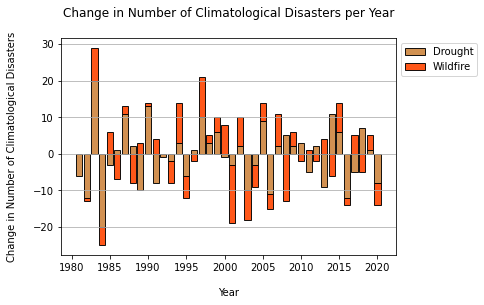

In [17]:
# single bar chart

change_data = np.array([drought_disaster_change, wildfire_disaster_change])

data_shape = np.shape(change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(change_data, **kwargs):
    cum = change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(change_data, min=0)
cumulated_data_neg = get_cumulated_array(change_data, max=0)

# Re-merge negative and positive data.
row_mask = (change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["peru", "orangered"]
labs = ["Drought", "Wildfire"]

fig = plt.figure()
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Change in Number of Climatological Disasters per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Change in Number of Climatological Disasters\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisasterChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

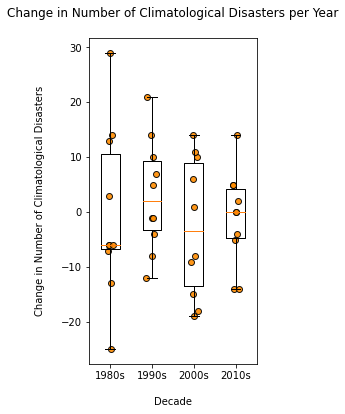

In [18]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES BOXPLOT

total_box_data = [climatological_disaster_change[0:10], climatological_disaster_change[10:20], climatological_disaster_change[20:30], climatological_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Change in Number of Climatological Disasters per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Change in Number of Climatological Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/climatologicalDisasterChangePerYearBOX.png", bbox_inches='tight')

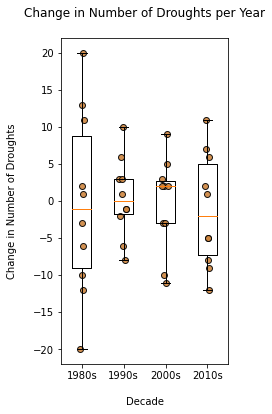

In [19]:
# YoY CHANGE IN DROUGHT OCCURANCES BOXPLOT

total_box_data = [drought_disaster_change[0:10], drought_disaster_change[10:20], drought_disaster_change[20:30], drought_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Change in Number of Droughts per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Change in Number of Droughts\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/droughtChangePerYearBOX.png", bbox_inches='tight')

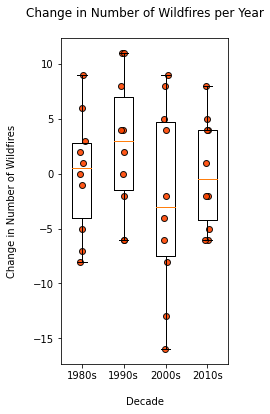

In [20]:
# YoY CHANGE IN WILDFIRE OCCURANCES BOXPLOT

total_box_data = [wildfire_disaster_change[0:10], wildfire_disaster_change[10:20], wildfire_disaster_change[20:30], wildfire_disaster_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Change in Number of Wildfires per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Change in Number of Wildfires\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'orangered', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Total Natural Disasters/total figures/wildfireChangePerYearBOX.png", bbox_inches='tight')

In [21]:
# CALCULATE YoY PERCENT CHANGE IN DISASTER OCCURANCES

climatological_percent_change = [(climatological_disaster_counts[i+1]-climatological_disaster_counts[i])/climatological_disaster_counts[i] for i in range(1980,2020)]
climatological_percent_change = pd.Series(climatological_percent_change)

drought_percent_change = [(drought_disaster_counts[i+1]-drought_disaster_counts[i])/drought_disaster_counts[i] for i in range(1980,2020)]
drought_percent_change = pd.Series(drought_percent_change)

wildfire_percent_change = [(wildfire_disaster_counts[i+1]-wildfire_disaster_counts[i])/wildfire_disaster_counts[i] for i in range(1980,2020)]
wildfire_percent_change = pd.Series(wildfire_percent_change)

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in longlong_scalars
  if __name__ == '__main__':


C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


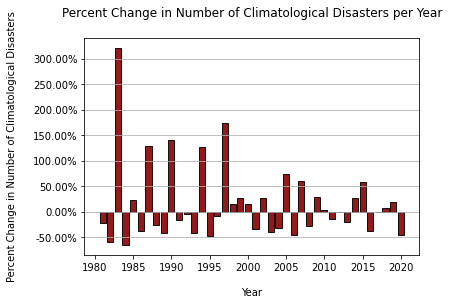

In [22]:
# single bar chart

fig, ax = plt.subplots(1)

plt.grid(axis = 'y')

plt.title("Percent Change in Number of Climatological Disasters per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Percent Change in Number of Climatological Disasters\n")

plt.bar(range(1981, 2021), climatological_percent_change, edgecolor = 'black', color = 'darkred', alpha = 0.9)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisasterPercentChangePerYearSBC.png", bbox_inches='tight')

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


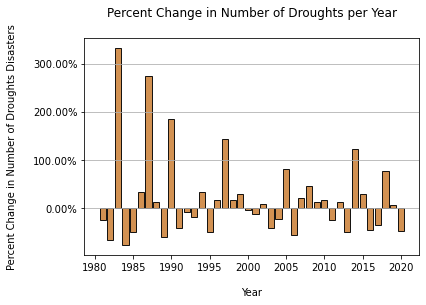

In [23]:
# single bar chart

fig, ax = plt.subplots(1)

plt.grid(axis = 'y')

plt.title("Percent Change in Number of Droughts per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Percent Change in Number of Droughts Disasters\n")

plt.bar(range(1981, 2021), drought_percent_change, edgecolor = 'black', color = 'peru', alpha = 0.9)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtDisasterPercentChangePerYearSBC.png", bbox_inches='tight')

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


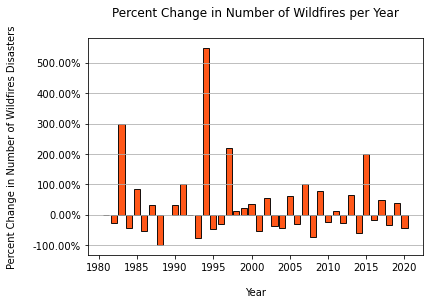

In [24]:
# single bar chart

fig, ax = plt.subplots(1)

plt.grid(axis = 'y')

plt.title("Percent Change in Number of Wildfires per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Percent Change in Number of Wildfires Disasters\n")

plt.bar(range(1981, 2021), wildfire_percent_change, edgecolor = 'black', color = 'orangered', alpha = 0.9)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfireDisasterPercentChangePerYearSBC.png", bbox_inches='tight')

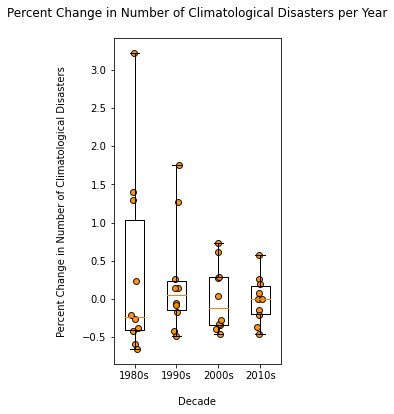

In [25]:
# YoY CHANGE IN DISASTER OCCURANCES BOXPLOT

total_box_data = [climatological_percent_change[0:10], climatological_percent_change[10:20], climatological_percent_change[20:30], climatological_percent_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Percent Change in Number of Climatological Disasters per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Percent Change in Number of Climatological Disasters\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisasterPercentChangePerYearBOX.png", bbox_inches='tight')

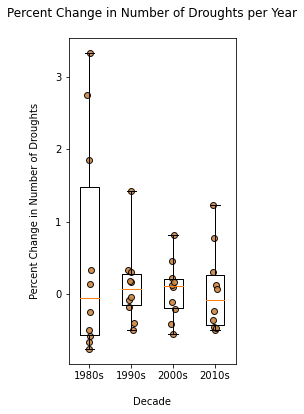

In [26]:
# YoY CHANGE IN DROUGHT OCCURANCES BOXPLOT

total_box_data = [drought_percent_change[0:10], drought_percent_change[10:20], drought_percent_change[20:30], drought_percent_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Percent Change in Number of Droughts per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Percent Change in Number of Droughts\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtDisasterPercentChangePerYearBOX.png", bbox_inches='tight')

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


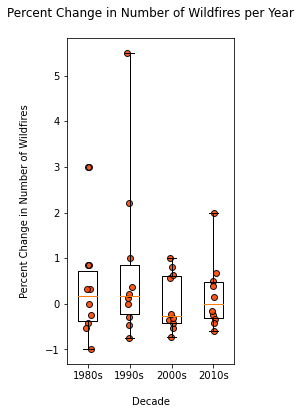

In [27]:
# YoY CHANGE IN wildfire OCCURANCES BOXPLOT

total_box_data = [wildfire_percent_change[0:10], wildfire_percent_change[10:20], wildfire_percent_change[20:30], wildfire_percent_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(3,6))
plt.title("Percent Change in Number of Wildfires per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Percent Change in Number of Wildfires\n")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_data[1], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_data[2], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_data[3], color = 'orangered', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfireDisasterPercentChangePerYearBOX.png", bbox_inches='tight')

# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES STATISTICS

In [28]:
# CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES ANALYSIS

print("CHANGE IN CLIMATOLOGICAL DISASTER Occurances ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Change in Disaster Occurances: ")
print(climatological_disaster_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Change in Disaster Occurances: ")
print(climatological_disaster_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Change in Disaster Occurances: ")
print(climatological_disaster_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Change in Disaster Occurances: ")
print(climatological_disaster_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Change in Disaster Occurances: ")
print(climatological_disaster_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = climatological_disaster_change[0:10].mean()
total_mean_2010s = climatological_disaster_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Disaster Occurances Yearly Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = climatological_disaster_change[0:10].max()
total_max_2010s = climatological_disaster_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Disaster Occurances Yearly Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = climatological_disaster_change[0:10].min()
total_min_2010s = climatological_disaster_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Disaster Occurances Yearly Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = climatological_disaster_change[0:10].std()
total_std_2010s = climatological_disaster_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Disaster Occurances Yearly Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN CLIMATOLOGICAL DISASTER Occurances ANALYSIS

Total Statistical Data on Yearly Change in Disaster Occurances: 
count    40.000000
mean     -0.275000
std      11.758221
min     -25.000000
25%      -8.000000
50%      -0.500000
75%       7.750000
max      29.000000
dtype: float64

1980s Statistical Data on Yearly Change in Disaster Occurances: 
count    10.000000
mean     -0.400000
std      15.507704
min     -25.000000
25%      -6.750000
50%      -6.000000
75%      10.500000
max      29.000000
dtype: float64

1990s Statistical Data on Yearly Change in Disaster Occurances: 
count    10.000000
mean      3.100000
std      10.224698
min     -12.000000
25%      -3.250000
50%       2.000000
75%       9.250000
max      21.000000
dtype: float64

2000s Statistical Data on Yearly Change in Disaster Occurances: 
count    10.00000
mean     -2.70000
std      12.63197
min     -19.00000
25%     -13.50000
50%      -3.50000
75%       9.00000
max      14.00000
dtype: float64

2010s Statistical Dat

In [29]:
# CHANGE IN DROUGHT DISASTER OCCURANCES ANALYSIS

print("CHANGE IN DROUGHT DISASTER Occurances ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Change in Drought Occurances: ")
print(drought_disaster_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Change in Drought Occurances: ")
print(drought_disaster_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Change in Drought Occurances: ")
print(drought_disaster_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Change in Drought Occurances: ")
print(drought_disaster_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Change in Drought Occurances: ")
print(drought_disaster_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = drought_disaster_change[0:10].mean()
total_mean_2010s = drought_disaster_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Drought Occurances Yearly Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = drought_disaster_change[0:10].max()
total_max_2010s = drought_disaster_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Drought Occurances Yearly Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = drought_disaster_change[0:10].min()
total_min_2010s = drought_disaster_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Drought Occurances Yearly Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = drought_disaster_change[0:10].std()
total_std_2010s = drought_disaster_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Drought Occurances Yearly Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN DROUGHT DISASTER Occurances ANALYSIS

Total Statistical Data on Yearly Change in Drought Occurances: 
count    40.000000
mean     -0.375000
std       8.094593
min     -20.000000
25%      -6.000000
50%       1.000000
75%       3.500000
max      20.000000
dtype: float64

1980s Statistical Data on Yearly Change in Drought Occurances: 
count    10.000000
mean     -0.400000
std      12.393547
min     -20.000000
25%      -9.000000
50%      -1.000000
75%       8.750000
max      20.000000
dtype: float64

1990s Statistical Data on Yearly Change in Drought Occurances: 
count    10.000000
mean      0.500000
std       5.359312
min      -8.000000
25%      -1.750000
50%       0.000000
75%       3.000000
max      10.000000
dtype: float64

2000s Statistical Data on Yearly Change in Drought Occurances: 
count    10.000000
mean     -0.400000
std       6.363088
min     -11.000000
25%      -3.000000
50%       2.000000
75%       2.750000
max       9.000000
dtype: float64

2010s Statistical Data o

In [30]:
# CHANGE IN WILDFIRE DISASTER OCCURANCES ANALYSIS

print("CHANGE IN WILDFIRE DISASTER Occurances ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Change in Wildfire Occurances: ")
print(wildfire_disaster_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Change in Wildfire Occurances: ")
print(wildfire_disaster_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Change in Wildfire Occurances: ")
print(wildfire_disaster_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Change in Wildfire Occurances: ")
print(wildfire_disaster_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Change in Wildfire Occurances: ")
print(wildfire_disaster_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = wildfire_disaster_change[0:10].mean()
total_mean_2010s = wildfire_disaster_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Wildfire Occurances Yearly Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = wildfire_disaster_change[0:10].max()
total_max_2010s = wildfire_disaster_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Wildfire Occurances Yearly Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = wildfire_disaster_change[0:10].min()
total_min_2010s = wildfire_disaster_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Wildfire Occurances Yearly Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = wildfire_disaster_change[0:10].std()
total_std_2010s = wildfire_disaster_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Wildfire Occurances Yearly Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN WILDFIRE DISASTER Occurances ANALYSIS

Total Statistical Data on Yearly Change in Wildfire Occurances: 
count    40.000000
mean      0.100000
std       6.495758
min     -16.000000
25%      -5.250000
50%       0.500000
75%       4.250000
max      11.000000
dtype: float64

1980s Statistical Data on Yearly Change in Wildfire Occurances: 
count    10.000000
mean      0.000000
std       5.477226
min      -8.000000
25%      -4.000000
50%       0.500000
75%       2.750000
max       9.000000
dtype: float64

1990s Statistical Data on Yearly Change in Wildfire Occurances: 
count    10.000000
mean      2.600000
std       6.239658
min      -6.000000
25%      -1.500000
50%       3.000000
75%       7.000000
max      11.000000
dtype: float64

2000s Statistical Data on Yearly Change in Wildfire Occurances: 
count    10.000000
mean     -2.300000
std       8.680118
min     -16.000000
25%      -7.500000
50%      -3.000000
75%       4.750000
max       9.000000
dtype: float64

2010s Statistical D

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


In [31]:
# CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES ANALYSIS

print("CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Percent Change in Disaster Occurances: ")
print(climatological_percent_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Percent Change in Disaster Occurances: ")
print(climatological_percent_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Percent Change in Disaster Occurances: ")
print(climatological_percent_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Percent Change in Disaster Occurances: ")
print(climatological_percent_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Percent Change in Disaster Occurances: ")
print(climatological_percent_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = climatological_percent_change[0:10].mean()
total_mean_2010s = climatological_percent_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Disaster Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = climatological_percent_change[0:10].max()
total_max_2010s = climatological_percent_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Disaster Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = climatological_percent_change[0:10].min()
total_min_2010s = climatological_percent_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Disaster Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = climatological_percent_change[0:10].std()
total_std_2010s = climatological_percent_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Disaster Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES ANALYSIS

Total Statistical Data on Yearly Percent Change in Disaster Occurances: 
count    40.000000
mean      0.153541
std       0.754148
min      -0.657895
25%      -0.351196
50%      -0.025000
75%       0.266813
max       3.222222
dtype: float64

1980s Statistical Data on Yearly Percent Change in Disaster Occurances: 
count    10.000000
mean      0.364227
std       1.245682
min      -0.657895
25%      -0.402574
50%      -0.237578
75%       1.032692
max       3.222222
dtype: float64

1990s Statistical Data on Yearly Percent Change in Disaster Occurances: 
count    10.000000
mean      0.238859
std       0.720274
min      -0.480000
25%      -0.144231
50%       0.047917
75%       0.235247
max       1.750000
dtype: float64

2000s Statistical Data on Yearly Percent Change in Disaster Occurances: 
count    10.000000
mean      0.015989
std       0.438747
min      -0.454545
25%      -0.339448
50%      -0.119413
75%       0.283730
max       0.7368

In [32]:
# CHANGE IN DROUGHT DISASTER OCCURANCES ANALYSIS

print("CHANGE IN DROUGHT DISASTER OCCURANCES ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Percent Change in Drought Occurances: ")
print(drought_percent_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Percent Change in Drought Occurances: ")
print(drought_percent_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Percent Change in Drought Occurances: ")
print(drought_percent_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Percent Change in Drought Occurances: ")
print(drought_percent_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Percent Change in Drought Occurances: ")
print(drought_percent_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = drought_percent_change[0:10].mean()
total_mean_2010s = drought_percent_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Drought Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = drought_percent_change[0:10].max()
total_max_2010s = drought_percent_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Drought Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = drought_percent_change[0:10].min()
total_min_2010s = drought_percent_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Drought Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = drought_percent_change[0:10].std()
total_std_2010s = drought_percent_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Drought Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN DROUGHT DISASTER OCCURANCES ANALYSIS

Total Statistical Data on Yearly Percent Change in Drought Occurances: 
count    40.000000
mean      0.196779
std       0.873251
min      -0.769231
25%      -0.404167
50%       0.076705
75%       0.308333
max       3.333333
dtype: float64

1980s Statistical Data on Yearly Percent Change in Drought Occurances: 
count    10.000000
mean      0.563301
std       1.519250
min      -0.769231
25%      -0.566176
50%      -0.058333
75%       1.476190
max       3.333333
dtype: float64

1990s Statistical Data on Yearly Percent Change in Drought Occurances: 
count    10.000000
mean      0.120143
std       0.538309
min      -0.500000
25%      -0.157197
50%       0.064103
75%       0.269118
max       1.428571
dtype: float64

2000s Statistical Data on Yearly Percent Change in Drought Occurances: 
count    10.000000
mean      0.057657
std       0.405554
min      -0.550000
25%      -0.190714
50%       0.107955
75%       0.208333
max       0.818182
dtype: f

In [33]:
# CHANGE IN WILDFIRE DISASTER OCCURANCES ANALYSIS

print("CHANGE IN WILDFIRE DISASTER OCCURANCES ANALYSIS")

# total statistical data
print("\nTotal Statistical Data on Yearly Percent Change in Wildfire Occurances: ")
print(wildfire_percent_change.describe())

# 1980s statistical data
print("\n1980s Statistical Data on Yearly Percent Change in Wildfire Occurances: ")
print(wildfire_percent_change[0:10].describe())

# 1990s statistical data
print("\n1990s Statistical Data on Yearly Percent Change in Wildfire Occurances: ")
print(wildfire_percent_change[10:20].describe())

# 2000s statistical data
print("\n2000s Statistical Data on Yearly Percent Change in Wildfire Occurances: ")
print(wildfire_percent_change[20:30].describe())

# 2010s statistical data
print("\n2010s Statistical Data on Yearly Percent Change in Wildfire Occurances: ")
print(wildfire_percent_change[30:40].describe())

print("\n")

# total statistical changes 1980s-2010s

total_mean_1980s = wildfire_percent_change[0:10].mean()
total_mean_2010s = wildfire_percent_change[30:40].mean()
mean_percent_change_1980_to_2020 = 100*(total_mean_2010s-total_mean_1980s)/abs(total_mean_1980s)
print("Percent Change of Mean Wildfire Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(mean_percent_change_1980_to_2020))

total_max_1980s = wildfire_percent_change[0:10].max()
total_max_2010s = wildfire_percent_change[30:40].max()
max_percent_change_1980_to_2020 = 100*(total_max_2010s-total_max_1980s)/abs(total_max_1980s)
print("Percent Change of Min Wildfire Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(max_percent_change_1980_to_2020))

total_min_1980s = wildfire_percent_change[0:10].min()
total_min_2010s = wildfire_percent_change[30:40].min()
min_percent_change_1980_to_2020 = 100*(total_min_2010s-total_min_1980s)/abs(total_min_1980s)
print("Percent Change of Max Wildfire Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(min_percent_change_1980_to_2020))

total_std_1980s = wildfire_percent_change[0:10].std()
total_std_2010s = wildfire_percent_change[30:40].std()
std_percent_change_1980_to_2020 = 100*(total_std_2010s-total_std_1980s)/abs(total_std_1980s)
print("Percent Change of Standard Deviation Wildfire Occurances Yearly Percent Change (1980s-2010s): {:.2f}%".format(std_percent_change_1980_to_2020))

CHANGE IN WILDFIRE DISASTER OCCURANCES ANALYSIS

Total Statistical Data on Yearly Percent Change in Wildfire Occurances: 
count    40.000000
mean           inf
std            NaN
min      -1.000000
25%      -0.376894
50%       0.062500
75%       0.635417
max            inf
dtype: float64

1980s Statistical Data on Yearly Percent Change in Wildfire Occurances: 
count    10.000000
mean           inf
std            NaN
min      -1.000000
25%      -0.375000
50%       0.166667
75%       0.726190
max            inf
dtype: float64

1990s Statistical Data on Yearly Percent Change in Wildfire Occurances: 
count    10.000000
mean      0.791361
std       1.852382
min      -0.750000
25%      -0.214286
50%       0.173611
75%       0.840909
max       5.500000
dtype: float64

2000s Statistical Data on Yearly Percent Change in Wildfire Occurances: 
count    10.000000
mean      0.041875
std       0.632950
min      -0.722222
25%      -0.412338
50%      -0.264957
75%       0.611607
max       1.000000
dty

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


# CLIMATOLOGICAL DISASTER COSTS ANALYSIS

In [34]:
drought_costs = drought_data[['Year', 'Total Damages']]
drought_costs = drought_costs.groupby('Year').sum()
drought_costs = drought_costs.squeeze()

wildfire_costs = wildfire_data[['Year', 'Total Damages']]
wildfire_costs = wildfire_costs.groupby('Year').sum()
wildfire_costs = wildfire_costs.squeeze()
wildfire_costs[1988] = 0
wildfire_costs = wildfire_costs.sort_index()

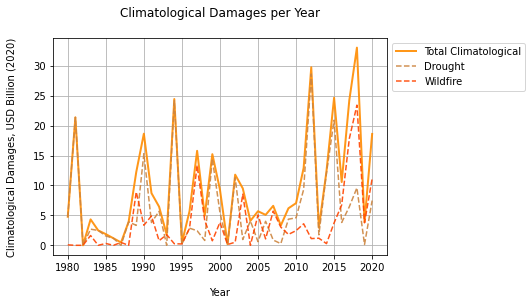

In [35]:
# single line plot

plt.grid(axis = 'both')
plt.title("Climatological Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Climatological Damages, USD Billion (2020)\n")
plt.plot(climatological_costs.index, climatological_costs, linewidth=2, color = 'darkorange', alpha = 0.9, label = 'Total Climatological')
plt.plot(drought_costs.index, drought_costs, linestyle = '--', color = 'peru', alpha = 0.9, label = 'Drought')
plt.plot(wildfire_costs.index, wildfire_costs, linestyle = '--', color = 'orangered', alpha = 0.9, label = 'Wildfire')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearSLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

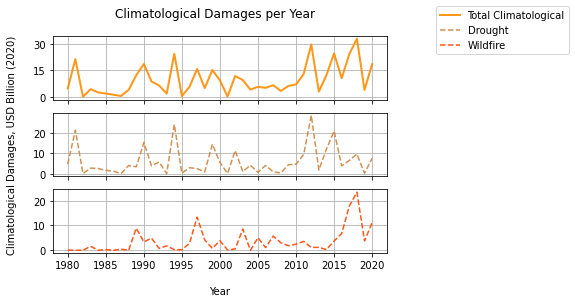

In [36]:
# multiple line plots

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Climatological Damages per Year\n")
axs[1].set_ylabel("Climatological Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].plot(climatological_costs.index, climatological_costs, linewidth=2, color = 'darkorange', alpha = 0.9, label = 'Total Climatological')
axs[1].plot(drought_costs.index, drought_costs, linestyle = '--', color = 'peru', alpha = 0.9, label = 'Drought')
axs[2].plot(wildfire_costs.index, wildfire_costs, linestyle = '--', color = 'orangered', alpha = 0.9, label = 'Wildfire')

plt.sca(axs[0])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'both')

plt.sca(axs[1])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'both')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearMLP.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

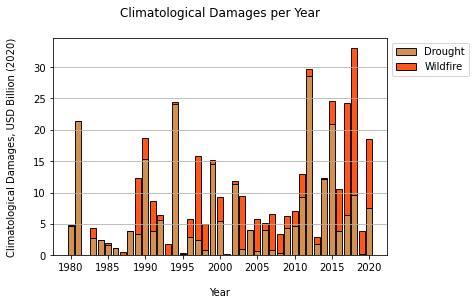

In [37]:
# single bar chart

plt.grid(axis = 'y')
plt.title("Climatological Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Climatological Damages, USD Billion (2020)\n")

plt.bar(drought_costs.index, drought_costs, edgecolor = 'black', color = 'peru', alpha = 0.9, label = 'Drought')
plt.bar(wildfire_costs.index, wildfire_costs, bottom = drought_costs, edgecolor = 'black', color = 'orangered', alpha = 0.9, label = 'Wildfire')

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

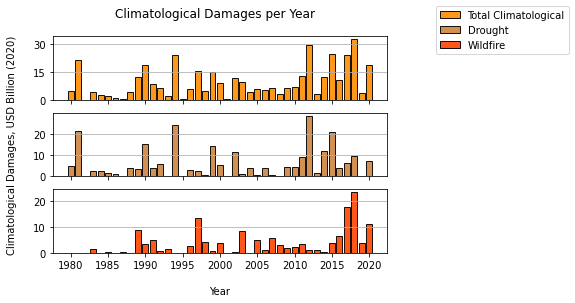

In [38]:
# multiple bar charts

fig, axs = plt.subplots(3, sharex = True)
fig.suptitle("Climatological Damages per Year\n")
axs[1].set_ylabel("Climatological Damages, USD Billion (2020)\n")
axs[2].set_xlabel("\nYear")

axs[0].bar(climatological_costs.index, climatological_costs, color = 'darkorange', alpha = 0.9, edgecolor = 'black', label = 'Total Climatological')
axs[1].bar(drought_costs.index, drought_costs, color = 'peru', alpha = 0.9, edgecolor = 'black', label = 'Drought')
axs[2].bar(wildfire_costs.index, wildfire_costs, color = 'orangered', alpha = 0.9, edgecolor = 'black', label = 'Wildfire')

plt.sca(axs[0])
plt.yticks(np.linspace(0,30,3))
plt.grid(axis = 'y')

plt.sca(axs[1])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

plt.sca(axs[2])
plt.yticks(np.linspace(0,20,3))
plt.grid(axis = 'y')

lgd = fig.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearMBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

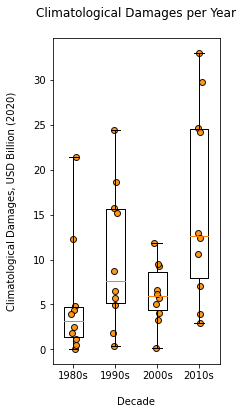

In [39]:
# BOXPLOT TOTAL CLIMATOLOGICAL COST DATA

climatological_box_data = [climatological_costs[0:10], climatological_costs[10:20], climatological_costs[20:30], climatological_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Climatological Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Climatological Damages, USD Billion (2020)\n")

plt.boxplot(climatological_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,climatological_box_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,climatological_box_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,climatological_box_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,climatological_box_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPerYearBOX.png", bbox_inches='tight')

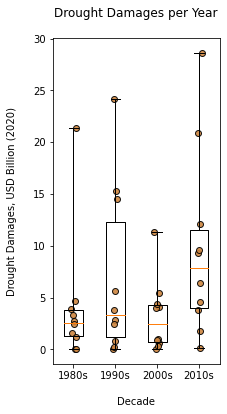

In [40]:
# BOXPLOT DROUGHT COST DATA

drought_box_data = [drought_costs[0:10], drought_costs[10:20], drought_costs[20:30], drought_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Drought Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Drought Damages, USD Billion (2020)\n")

plt.boxplot(drought_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,drought_box_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,drought_box_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,drought_box_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,drought_box_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtCostsPerYearBOX.png", bbox_inches='tight')

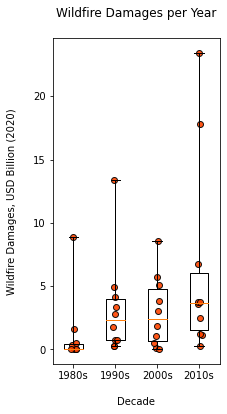

In [41]:
# BOXPLOT WILDFIRE COST DATA

wildfire_box_data = [wildfire_costs[0:10], wildfire_costs[10:20], wildfire_costs[20:30], wildfire_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Wildfire Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Wildfire Damages, USD Billion (2020)\n")

plt.boxplot(wildfire_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,wildfire_box_data[0], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,wildfire_box_data[1], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,wildfire_box_data[2], color = 'orangered', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,wildfire_box_data[3], color = 'orangered', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfireCostsPerYearBOX.png", bbox_inches='tight')

# CLIMATOLOGICAL DISASTER COSTS STATISTICS

In [42]:
# CLIMATOLOGICAL DISASTER COST ANALYSIS

print("CLIMATOLOGICAL DISASTER COST ANALYSIS")

# climatological costs statistical data
print("\nTotal Climatological Costs Statistical Data: ")
print(climatological_costs.describe())

# 1980s climatological costs statistical data
print("\n1980s Climatological Costs Statistical Data: ")
print(climatological_costs[0:10].describe())

# 1990s climatological costs statistical data
print("\n1990s Climatological Costs Statistical Data: ")
print(climatological_costs[10:20].describe())

# 2000s climatological costs statistical data
print("\n2000s Climatological Costs Statistical Data: ")
print(climatological_costs[20:30].describe())

# 2010s climatological costs statistical data
print("\n2010s Climatological Costs Statistical Data: ")
print(climatological_costs[30:40].describe())

print("\n")

# climatological costs statistical changes 1980s-2010s
climatological_mean_costs_1980s = climatological_costs[0:10].mean()
climatological_mean_costs_2010s = climatological_costs[30:40].mean()
mean_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_mean_costs_2010s-climatological_mean_costs_1980s)/climatological_mean_costs_1980s
print("Mean Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_climatological_1980_to_2020))

climatological_max_costs_1980s = climatological_costs[0:10].max()
climatological_max_costs_2010s = climatological_costs[30:40].max()
max_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_max_costs_2010s-climatological_max_costs_1980s)/climatological_max_costs_1980s
print("Max Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_climatological_1980_to_2020))

climatological_min_costs_1980s = climatological_costs[0:10].min()
climatological_min_costs_2010s = climatological_costs[30:40].min()
min_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_min_costs_2010s-climatological_min_costs_1980s)/climatological_min_costs_1980s
print("Min Climatological Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_climatological_1980_to_2020))

climatological_std_costs_1980s = climatological_costs[0:10].std()
climatological_std_costs_2010s = climatological_costs[30:40].std()
std_costs_percent_change_climatological_1980_to_2020 = 100*(climatological_std_costs_2010s-climatological_std_costs_1980s)/climatological_std_costs_1980s
print("Standard Deviation of Climatological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_climatological_1980_to_2020))

CLIMATOLOGICAL DISASTER COST ANALYSIS

Total Climatological Costs Statistical Data: 
count    41.000000
mean      9.677076
std       8.590469
min       0.000000
25%       3.901167
50%       6.459137
75%      12.936397
max      33.035825
Name: Total Damages, dtype: float64

1980s Climatological Costs Statistical Data: 
count    10.000000
mean      5.268973
std       6.650199
min       0.000000
25%       1.349829
50%       3.209343
75%       4.671573
max      21.384256
Name: Total Damages, dtype: float64

1990s Climatological Costs Statistical Data: 
count    10.000000
mean     10.216700
std       7.899228
min       0.418676
25%       5.138738
50%       7.588558
75%      15.651043
max      24.449320
Name: Total Damages, dtype: float64

2000s Climatological Costs Statistical Data: 
count    10.000000
mean      6.179280
std       3.378803
min       0.184159
25%       4.339011
50%       5.941260
75%       8.632401
max      11.808952
Name: Total Damages, dtype: float64

2010s Climatological 

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


In [43]:
# DROUGHT DISASTER COST ANALYSIS

print("DROUGHT DISASTER COST ANALYSIS")

# drought costs statistical data
print("\nTotal Drought Costs Statistical Data: ")
print(drought_costs.describe())

# 1980s drought costs statistical data
print("\n1980s Drought Costs Statistical Data: ")
print(drought_costs[0:10].describe())

# 1990s drought costs statistical data
print("\n1990s Drought Costs Statistical Data: ")
print(drought_costs[10:20].describe())

# 2000s drought costs statistical data
print("\n2000s Drought Costs Statistical Data: ")
print(drought_costs[20:30].describe())

# 2010s drought costs statistical data
print("\n2010s Drought Costs Statistical Data: ")
print(drought_costs[30:40].describe())

print("\n")

# drought costs statistical changes 1980s-2010s
drought_mean_costs_1980s = drought_costs[0:10].mean()
drought_mean_costs_2010s = drought_costs[30:40].mean()
mean_costs_percent_change_drought_1980_to_2020 = 100*(drought_mean_costs_2010s-drought_mean_costs_1980s)/drought_mean_costs_1980s
print("Mean Drought Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_drought_1980_to_2020))

drought_max_costs_1980s = drought_costs[0:10].max()
drought_max_costs_2010s = drought_costs[30:40].max()
max_costs_percent_change_drought_1980_to_2020 = 100*(drought_max_costs_2010s-drought_max_costs_1980s)/drought_max_costs_1980s
print("Max Drought Disaster Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_drought_1980_to_2020))

drought_min_costs_1980s = drought_costs[0:10].min()
drought_min_costs_2010s = drought_costs[30:40].min()
min_costs_percent_change_drought_1980_to_2020 = 100*(drought_min_costs_2010s-drought_min_costs_1980s)/drought_min_costs_1980s
print("Min Drought Disaster Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_drought_1980_to_2020))

drought_std_costs_1980s = drought_costs[0:10].std()
drought_std_costs_2010s = drought_costs[30:40].std()
std_costs_percent_change_drought_1980_to_2020 = 100*(drought_std_costs_2010s-drought_std_costs_1980s)/drought_std_costs_1980s
print("Standard Deviation of Drought Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_drought_1980_to_2020))

DROUGHT DISASTER COST ANALYSIS

Total Drought Costs Statistical Data: 
count    41.000000
mean      6.045993
std       7.151921
min       0.000000
25%       0.969036
50%       3.820190
75%       7.475883
max      28.631512
Name: Total Damages, dtype: float64

1980s Drought Costs Statistical Data: 
count    10.000000
mean      4.126815
std       6.261921
min       0.000000
25%       1.272975
50%       2.591700
75%       3.780121
max      21.384256
Name: Total Damages, dtype: float64

1990s Drought Costs Statistical Data: 
count    10.000000
mean      6.976877
std       8.190247
min       0.003572
25%       1.217896
50%       3.335795
75%      12.278546
max      24.184762
Name: Total Damages, dtype: float64

2000s Drought Costs Statistical Data: 
count    10.000000
mean      3.201961
std       3.478849
min       0.053033
25%       0.677530
50%       2.490917
75%       4.294161
max      11.289612
Name: Total Damages, dtype: float64

2010s Drought Costs Statistical Data: 
count    10.00000

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


In [44]:
# WILDFIRE DISASTER COST ANALYSIS

print("WILDFIRE DISASTER COST ANALYSIS")

# wildfire costs statistical data
print("\nTotal Wildfire Costs Statistical Data: ")
print(wildfire_costs.describe())

# 1980s wildfire costs statistical data
print("\n1980s Wildfire Costs Statistical Data: ")
print(wildfire_costs[0:10].describe())

# 1990s wildfire costs statistical data
print("\n1990s Wildfire Costs Statistical Data: ")
print(wildfire_costs[10:20].describe())

# 2000s wildfire costs statistical data
print("\n2000s Wildfire Costs Statistical Data: ")
print(wildfire_costs[20:30].describe())

# 2010s wildfire costs statistical data
print("\n2010s Wildfire Costs Statistical Data: ")
print(wildfire_costs[30:40].describe())

print("\n")

# wildfire costs statistical changes 1980s-2010s
wildfire_mean_costs_1980s = wildfire_costs[0:10].mean()
wildfire_mean_costs_2010s = wildfire_costs[30:40].mean()
mean_costs_percent_change_wildfire_1980_to_2020 = 100*(wildfire_mean_costs_2010s-wildfire_mean_costs_1980s)/wildfire_mean_costs_1980s
print("Mean Wildfire Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_wildfire_1980_to_2020))

wildfire_max_costs_1980s = wildfire_costs[0:10].max()
wildfire_max_costs_2010s = wildfire_costs[30:40].max()
max_costs_percent_change_wildfire_1980_to_2020 = 100*(wildfire_max_costs_2010s-wildfire_max_costs_1980s)/wildfire_max_costs_1980s
print("Max Wildfire Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_wildfire_1980_to_2020))

wildfire_min_costs_1980s = wildfire_costs[0:10].min()
wildfire_min_costs_2010s = wildfire_costs[30:40].min()
min_costs_percent_change_wildfire_1980_to_2020 = 100*(wildfire_min_costs_2010s-wildfire_min_costs_1980s)/wildfire_min_costs_1980s
print("Min Wildfire Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(min_costs_percent_change_wildfire_1980_to_2020))

wildfire_std_costs_1980s = wildfire_costs[0:10].std()
wildfire_std_costs_2010s = wildfire_costs[30:40].std()
std_costs_percent_change_wildfire_1980_to_2020 = 100*(wildfire_std_costs_2010s-wildfire_std_costs_1980s)/wildfire_std_costs_1980s
print("Standard Deviation of Wildfire Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_wildfire_1980_to_2020))

WILDFIRE DISASTER COST ANALYSIS

Total Wildfire Costs Statistical Data: 
count    41.000000
mean      3.631082
std       5.077129
min       0.000000
25%       0.282243
50%       1.785867
75%       4.140412
max      23.426130
Name: Total Damages, dtype: float64

1980s Wildfire Costs Statistical Data: 
count    10.000000
mean      1.142158
std       2.777531
min       0.000000
25%       0.000000
50%       0.043178
75%       0.434495
max       8.914672
Name: Total Damages, dtype: float64

1990s Wildfire Costs Statistical Data: 
count    10.000000
mean      3.239823
std       3.920823
min       0.227707
25%       0.763526
50%       2.308544
75%       3.942204
max      13.354248
Name: Total Damages, dtype: float64

2000s Wildfire Costs Statistical Data: 
count    10.000000
mean      2.977319
std       2.822128
min       0.004098
25%       0.657935
50%       2.428175
75%       4.773340
max       8.547429
Name: Total Damages, dtype: float64

2010s Wildfire Costs Statistical Data: 
count    10

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


In [45]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER COSTS ANALYSIS

In [46]:
# CALCULATE YoY CHANGE IN DISASTER COSTS

climatological_costs_change = [climatological_costs[i+1]-climatological_costs[i] for i in range(1980,2020)]
climatological_costs_change = pd.Series(climatological_costs_change)

drought_costs_change = [drought_costs[i+1]-drought_costs[i] for i in range(1980,2020)]
drought_costs_change = pd.Series(drought_costs_change)

wildfire_costs_change = [wildfire_costs[i+1]-wildfire_costs[i] for i in range(1980,2020)]
wildfire_costs_change = pd.Series(wildfire_costs_change)

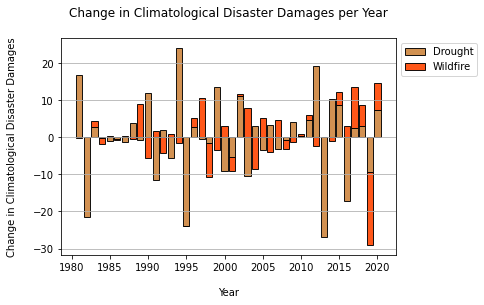

In [47]:
# single bar chart

costs_change_data = np.array([drought_costs_change, wildfire_costs_change])

data_shape = np.shape(costs_change_data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(costs_change_data, **kwargs):
    cum = costs_change_data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(costs_change_data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(costs_change_data, min=0)
cumulated_data_neg = get_cumulated_array(costs_change_data, max=0)

# Re-merge negative and positive data.
row_mask = (costs_change_data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["peru", "orangered"]
labs = ["Drought", "Wildfire"]

#fig = plt.figure(figsize=(5,20))
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(range(1981, 2021), costs_change_data[i], bottom=data_stack[i], edgecolor = 'black', color=cols[i], alpha = 0.9, label = labs[i])

plt.grid(axis = 'y')

plt.title("Change in Climatological Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Change in Climatological Disaster Damages\n")

lgd = plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalDisasterCostsChangePerYearSBC.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

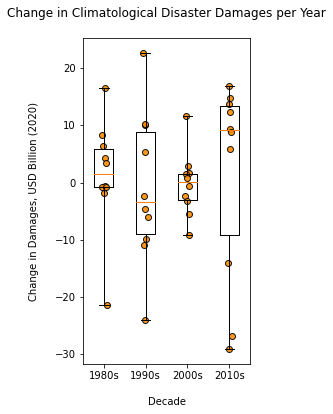

In [48]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES BOXPLOT

total_box_cost_data = [climatological_costs_change[0:10], climatological_costs_change[10:20], climatological_costs_change[20:30], climatological_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Change in Climatological Disaster Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsChangePerYearBOX.png", bbox_inches='tight')


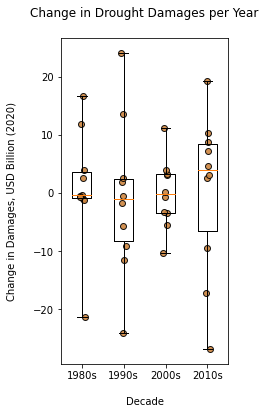

In [49]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES BOXPLOT

total_box_cost_data = [drought_costs_change[0:10], drought_costs_change[10:20], drought_costs_change[20:30], drought_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Change in Drought Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtCostsChangePerYearBOX.png", bbox_inches='tight')


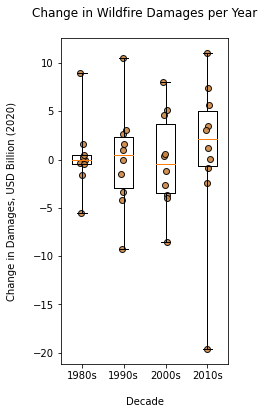

In [50]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES BOXPLOT

total_box_cost_data = [wildfire_costs_change[0:10], wildfire_costs_change[10:20], wildfire_costs_change[20:30], wildfire_costs_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,6))
plt.title("Change in Wildfire Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfireCostsChangePerYearBOX.png", bbox_inches='tight')


In [51]:
climatological_costs_percent_change = [(climatological_costs[i+1]-climatological_costs[i])/climatological_costs[i] for i in range(1980,2020)]
climatological_costs_percent_change = pd.Series(climatological_costs_percent_change)

drought_costs_percent_change = [(drought_costs[i+1]-drought_costs[i])/drought_costs[i] for i in range(1980,2020)]
drought_costs_percent_change = pd.Series(drought_costs_percent_change)

wildfire_costs_percent_change = [(wildfire_costs[i+1]-wildfire_costs[i])/wildfire_costs[i] for i in range(1980,2020)]
wildfire_costs_percent_change = pd.Series(wildfire_costs_percent_change)

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


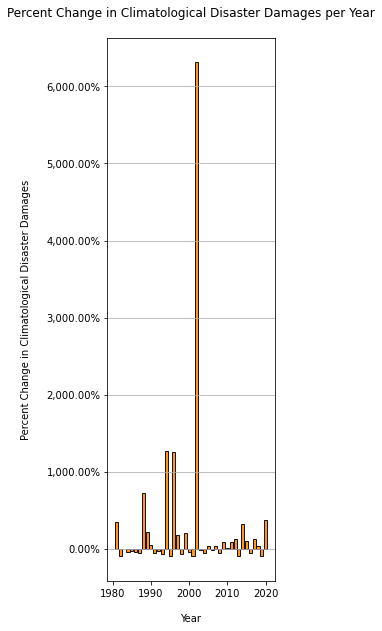

In [52]:
# single bar chart

fig, ax = plt.subplots(1, figsize = (3,10))

plt.grid(axis = 'y')

plt.title("Percent Change in Climatological Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Percent Change in Climatological Disaster Damages\n")

plt.bar(range(1981, 2021), climatological_costs_percent_change, edgecolor = 'black', color = 'darkorange', alpha = 0.9)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPercentChangePerYearSBC.png", bbox_inches='tight')

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


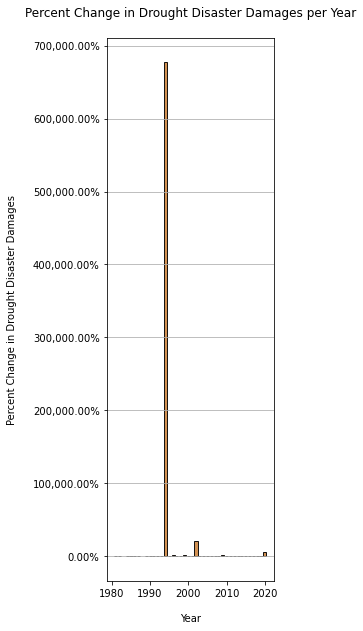

In [53]:
# single bar chart

fig, ax = plt.subplots(1, figsize = (3,10))

plt.grid(axis = 'y')

plt.title("Percent Change in Drought Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Percent Change in Drought Disaster Damages\n")

plt.bar(range(1981, 2021), drought_costs_percent_change, edgecolor = 'black', color = 'peru', alpha = 0.9)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtCostsPercentChangePerYearSBC.png", bbox_inches='tight')

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


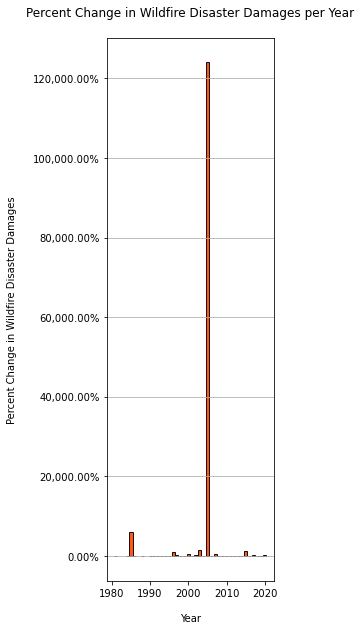

In [54]:
# single bar chart

fig, ax = plt.subplots(1, figsize = (3,10))

plt.grid(axis = 'y')

plt.title("Percent Change in Wildfire Disaster Damages per Year\n")
plt.xlabel("\nYear")
plt.ylabel("Percent Change in Wildfire Disaster Damages\n")

plt.bar(range(1981, 2021), wildfire_costs_percent_change, edgecolor = 'black', color = 'orangered', alpha = 0.9)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfireCostsPercentChangePerYearSBC.png", bbox_inches='tight')

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


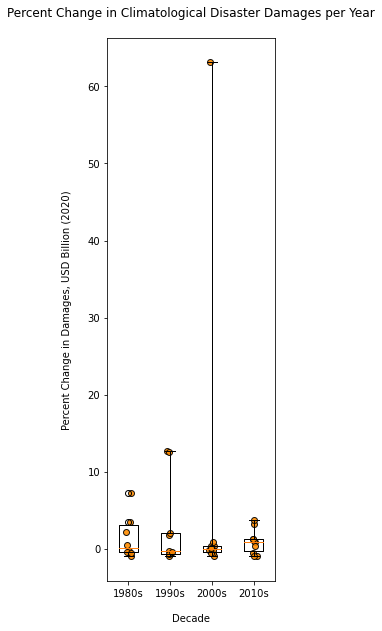

In [55]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES BOXPLOT

total_box_cost_data = [climatological_costs_percent_change[0:10], climatological_costs_percent_change[10:20], climatological_costs_percent_change[20:30], climatological_costs_percent_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,10))
plt.title("Percent Change in Climatological Disaster Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Percent Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'darkorange', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'darkorange', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/climatologicalCostsPercentChangePerYearBOX.png", bbox_inches='tight')


C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


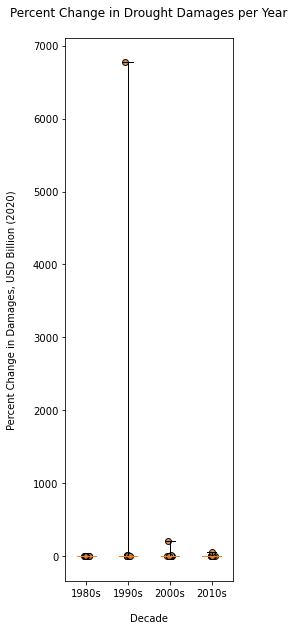

In [56]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES BOXPLOT

total_box_cost_data = [drought_costs_percent_change[0:10], drought_costs_percent_change[10:20], drought_costs_percent_change[20:30], drought_costs_percent_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,10))
plt.title("Percent Change in Drought Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Percent Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/droughtPercentCostsChangePerYearBOX.png", bbox_inches='tight')


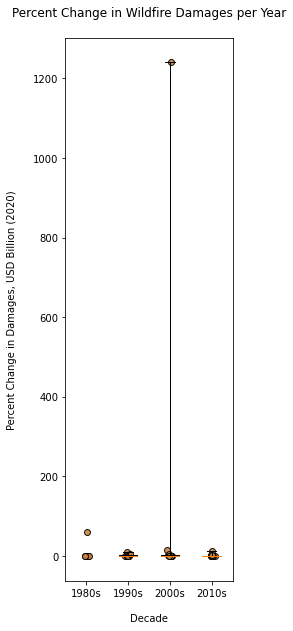

In [57]:
# YoY CHANGE IN CLIMATOLOGICAL DISASTER OCCURANCES BOXPLOT

total_box_cost_data = [wildfire_costs_percent_change[0:10], wildfire_costs_percent_change[10:20], wildfire_costs_percent_change[20:30], wildfire_costs_percent_change[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(3,10))
plt.title("Percent Change in Wildfire Damages per Year\n")
plt.xlabel("\nDecade")
plt.ylabel("Percent Change in Damages, USD Billion (2020)\n")

plt.boxplot(total_box_cost_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_cost_data[0], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x1,total_box_cost_data[1], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x2,total_box_cost_data[2], color = 'peru', edgecolor = 'black', alpha = 0.9)
plt.scatter(x3,total_box_cost_data[3], color = 'peru', edgecolor = 'black', alpha = 0.9)

plt.savefig("C:/Users/Felix/Documents/GitHub/naturalDisasterAnalysis/Climatological Disasters/climatological figures/wildfirePercentCostsChangePerYearBOX.png", bbox_inches='tight')
